<a href="https://colab.research.google.com/github/douglascdsantos/data_science/blob/main/projetos/analisando_os_dados_do_airbnb_(tokyo)/notebook/Analisando_os_Dados_do_Airbnb_(Tokyo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisedos dados do Airbnb da cidade de Tokyo

O [Airbnb](https://www.airbnb.com) nasceu em 2008 conectando pessoas que pussuiam quartos ociosos em suas casas com pessoas que precisavam de acomodação temporária, hoje em dia é possível um comodo ou o imóvel todo e eles não trabalham somente com acomodação, mas também com um experiência online - um ótimo serviço em tempos de reclusão e isolamento por sinal.

O Airbnb consegue estar presente em mais de 100.000 cidades do mundo inteiro **sem ter nenhum hotel**, nesse modelo de negocios temos uma geração de dados muito grande a qual é disponibilizada por meio do Inside [Airbnb](http://insideairbnb.com/index.html), dentro do portal temos a diversas opção de cidades pelo mundo e varias tipos de dados da mesma cidade, no presente estudo optamos pela escolha da cidade de Tokyo.

## Objetivos

Nesta análise espera-se responder questões como:

- Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?
- Qual a porcentagem de valores ausentes no dataset?
- Qual o tipo de distribuição das variáveis?
- Há outliers presentes?
- Qual a correlação existente entre as variáveis
- Qual o tipo de imóvel mais alugado no Airbnb?
- Qual a localidade mais cara de Tokyo?

E as de mais que aparecerem durante o desenvolvimento do projeto.

## Obtenção dos dados
Os dados utilizados estão disponiveis no portal [Inside Airbnb](http://insideairbnb.com/), basta procurar por `Tokyo`, a data de compilação do arquivo estava como 29 de setembro de 2021, para evitar alteração do arquivo, caso o arquivo viesse direito do portal, durante o desenvolvimento do projeto o aquivo foi carregado no GitHub, e pode se encontrado neste link.
Iremos utilizar o seguinte arquivo para nossa análise exploratória:
- `listings.csv` - *Summary information and metrics for listings in Tokyo (good for visualisations)*.

Dessa forma podemos iniciar.

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [36]:
# url do dataset salvo no github
url = 'https://raw.githubusercontent.com/douglascdsantos/data_science/main/projetos/analisando_os_dados_do_airbnb_(tokyo)/listings.csv'

# importação do dataset em um DataFrame
airbnb = pd.read_csv(url,
                     parse_dates = ['last_review'])

## Tratamento e seleção dos dados
Inicialmente vamos começar a ter contato com os dados, dessa forma vamos listar as features (colunas) e qual o seu significado


### Dicionário das Variáveis
- `id`: númuero único que identifica o imóvel;
- `name`: nome da propriedade;
- `host_id`: nome do proprietário (locador) do imóvel;
- `neighbourhood_group`: grupo do bairro;
- `neighbourhood`: bairro;
- `latitude`: coordenada de latitude da localização;
- `longitude`: coordenada de longitude da localização;
- `room_type`: tipo do quarto do anúncio;
- `price`: preço do aluguel;
- `minimum_nights`: quantidade minima de noite;
- `number_of_reviews`: números de reviews que a acomodação possui;
- `last_review`: data do último review;
- `reviews_per_month`: reviews por mês;
- `calculated_host_listings_count`: quatidade de acomodações por anfitrião;
- `availability_365`: disponibilidade em 365 dias;
- `number_of_reviews_ltm`: número de reviews nos últimos 12 meses;
- `license`: licença.

Vamos então verificar as extremidades do nosso dataset, geralmente podemos pegar alguma inconsistência nas entradas dependendo da meneira de como é registrada.

In [37]:
# conferindo as primeiras 5 entradas
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71707,139.82608,Entire home/apt,11000,3,165,2019-11-14,1.50,1,363,0,M130003350
1,776070,Kero-kero house room 1,801494,Kei,NaN,Kita Ku,35.73844,139.76917,Private room,7816,3,228,2020-01-18,2.33,1,216,0,M130000243
2,1033276,private room @Senju area,5686404,Yukiko,NaN,Adachi Ku,35.74437,139.79739,Private room,30000,1,72,2018-04-15,0.78,2,270,0,M130007760
3,1096292,Home stay with a Japanese language teacher fam...,6018145,Mari,NaN,Shinjuku Ku,35.69233,139.70851,Private room,14036,1,252,2020-02-12,2.73,3,365,1,M130002814
4,1196177,Stay with host Cozy private room Senju area,5686404,Yukiko,NaN,Adachi Ku,35.74475,139.79731,Private room,3000,2,95,2020-03-17,0.98,2,88,0,M130007760


In [38]:
# conferindo uma amostra aleatória de 5 entradas
airbnb.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
4198,34070227,50㎡ DeluxeFamilySuite/5min from Hirai sta/Max ...,229388614,Kaoru,NaN,Edogawa Ku,35.70978,139.84460,Entire home/apt,14100,1,29,2020-02-12,1.01,6,81,3,M130013697
1861,25377337,【Ginza/Tokyo area】 Junior Suite (Free Wi-Fi),40200307,Hotel Vintage,NaN,Chuo Ku,35.67128,139.77768,Private room,6934,1,426,2021-09-01,12.58,2,87,416,Hotels and Inns Business Act | 東京都中央区所長 中橋 猛 |...
2869,29810892,FF278 Shibuya sta. 6mins walk! Max 3ppl with W...,224267449,Yuri,NaN,Shibuya Ku,35.65865,139.69524,Entire home/apt,19686,1,69,2020-02-08,2.01,2,0,14,M130009895
9996,50015885,Kuramae station #HighQualityHouse@FreeFixed wifi,378179123,L.G.X,NaN,Sumida Ku,35.70600,139.79847,Entire home/apt,8500,1,1,2021-09-09,1.00,1,177,1,M130026000
9755,49101320,5minJR sta#HighQualityHouse@NostalgicOtsuka(6F-2),197405131,春樹,NaN,Toshima Ku,35.72960,139.73463,Entire home/apt,6089,1,0,NaT,NaN,46,177,0,M130028851


In [39]:
# conferindo as últimas 5 entradas
airbnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
10665,52486420,new open/新宿/大久保5分/免费WiFi,310747973,Yama,NaN,Shinjuku Ku,35.704780,139.692704,Entire home/apt,5600,1,0,NaT,NaN,7,175,0,Hotels and Inns Business Act | 新宿区保健所 | 2新保衛環第94号
10666,52497948,48密や時間を気にせず友人たちと集まれる新築2階建貸切♪無料駐車あり☆目の前にスーパー☆シェ...,183877565,UI Home Company,NaN,Sumida Ku,35.731955,139.819147,Entire home/apt,14429,1,0,NaT,NaN,31,174,0,Hotels and Inns Business Act | 墨田区保健所 | 3墨福衛生環...
10667,52497968,【学生限定 男子専用】☆通学ラクラク～自宅とホステルの2拠点生活！気軽に１人暮らし体験！？ベッド②,147279325,Khaosan World Asakusa Ryokan&Hostel,NaN,Taito Ku,35.715706,139.791221,Shared room,1200,1,0,NaT,NaN,15,90,0,Hotels and Inns Business Act | 東京都台東区台東保健所 | 2...
10668,52498653,【学生限定 女子専用】☆通学ラクラク～自宅とホステルの2拠点生活！気軽に１人暮らし体験！？ベッド②,147279325,Khaosan World Asakusa Ryokan&Hostel,NaN,Taito Ku,35.714026,139.790688,Shared room,1200,1,0,NaT,NaN,15,90,0,Hotels and Inns Business Act | 東京都台東区台東保健所 | ...
10669,52499934,新御徒町徒步5分钟#秋叶原车站#艺术感十足房#机场直达45分#免费Wi-Fi,287778251,Hasegawa,NaN,Taito Ku,35.704133,139.783314,Private room,3100,1,0,NaT,NaN,10,359,0,M130017605


### Seleção das features de interesse
Afim de filtrar as features que nos interessa, por não ser tão compreensivel ler nomes em japonês, descartamos:
- `license`;
- `host_name`;
- `name`.

Aproveitando também para passar os valores de `price` de ienes para reais, no presente dia que desenvolvo esse projeto temos que 1 iene = 0,049 real, dessa forma temos

In [41]:
# criar uma cópia do dataframe
df = airbnb.copy()

# removendo as features que não nos interessa
df.drop(['license', 'host_name','name'],
        axis = 1,
        inplace = True)

# conversão da moeda de ienes para reais
iene_em_reais = 0.049
df.price = df.price * iene_em_reais

##**Análise dos Dados**
O presente *dataset* é uma versão resumida fornecida pelo Airbnb, no mesmo portal onde foi obtido os dados há uma versão com muito mais features.

###**Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
O atual possui 15 variáveis (lembrando que removemos 3 delas por questão de escopo do projeto) com 10670 entradas, também temos os tipos das variáveis.

In [42]:
# imprimir a quantidade de entradas e de variáveis
print(f'Entradas: {df.shape[0]}\nVariáveis: {df.shape[1]}\n')

# mostrando o tipo de cada variável
df.dtypes

Entradas: 10670
Variáveis: 15



id                                         int64
host_id                                    int64
neighbourhood_group                      float64
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
dtype: object

###**Q2. Qual a porcentagem de valores ausentes no dataset?**
A respeito de dados ausentes temos:
- `neighbourhood_group` está completamente vazia, dessa forma podemos remove-lá;
- `last_review` e `reviews_per_month` essa duas features com o mesmo valor, o que é esperado, uma vez que uma feature depende da outra, quanto ao percentual de dados ausente não é um problema pois é um comportamento normal, uma vez que é possível concluir uma transação sem dar uma avaliação

In [43]:
(df.isnull().sum()/airbnb.shape[0] * 100).sort_values(ascending=False)

neighbourhood_group               100.000000
reviews_per_month                  19.568885
last_review                        19.568885
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

In [44]:
# removendo a variável 'neighbourhood_group'
df.drop(['neighbourhood_group'],
        axis = 1,
        inplace = True)

### **Q3. Qual o tipo de distribuição das variáveis?** 
Aqui temos somente a variável `availability_365` com uma maior dispersão, as de mais mostra que temos um valor alvo, mas isso se dá em razão de valores muitos altos em nossa amostra, como por exemplo em `price`, `minimum_nights`, as de mais é esperado que tenha valores altos como o número de reviews e suas variantes


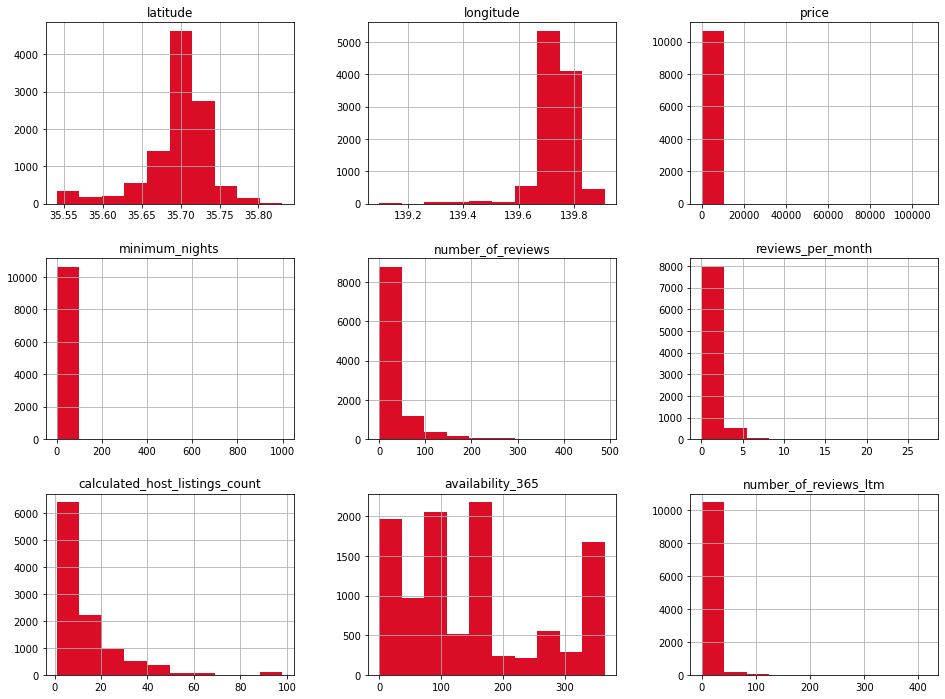

In [85]:
df[['latitude','longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365','number_of_reviews_ltm']].hist(color = '#db0c26',figsize=(16,12));

### **Q4. Há *outliers* presentes?**
Por não seguir uma distribuição, há indícios de presença de *outliers* em `price` e `mininum_nights`, vamos conferir algumas medidas estatísticas dessas variáveis

In [89]:
# resumo estatístico das varíaveis de interesse
df[['price','minimum_nights']].describe()

,price,minimum_nights
count,10670.000000,10670.000000
mean,627.875837,3.594283
std,2078.308955,24.674502
min,0.000000,1.000000
25%,208.593000,1.000000
50%,343.000000,1.000000
75%,606.399500,2.000000
max,107065.000000,999.000000


Com base no resumo estatístico, temos que:
- a variável `price` possui 75% dos dados abaixo de 606,40 e o valor máximo chega 107065,00;
- quanto a variável `minimum_nights` temos valores acima de 365 dias no ano, sendo que 75% dos dados está baixo de 2.

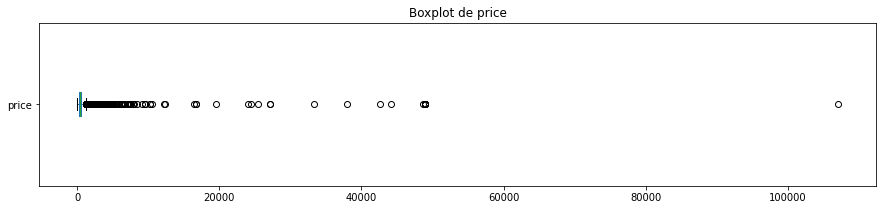


Valores acima de 2500 da variável price temos 208 entradas, que correspondem 1.95% do nosso dataset



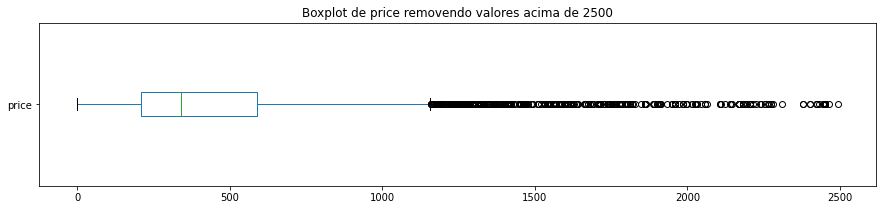

In [118]:
# price
df.price.plot.box(vert=False, figsize = (15,3));
plt.title('Boxplot de price')
plt.show()

# ver quantidade de valores acima de 1500 para price
valor_corte_price = 2500
print(f'''\nValores acima de {valor_corte_price} da variável price temos {len(df[df.price > valor_corte_price])} entradas, que correspondem {((len(df[df.price > valor_corte_price]) / df.shape[0])):.2%} do nosso dataset\n''')

df.price[df.price <= valor_corte_price].plot.box(vert=False, figsize = (15,3));
plt.title(f'Boxplot de price removendo valores acima de {valor_corte_price}')
plt.show()
# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

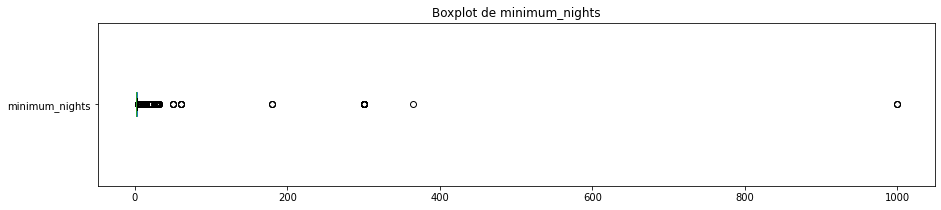


Para valores acima de 30 dias da variável minimum_nights temos 56 entradas, que correspondem 0.52% do nosso dataset



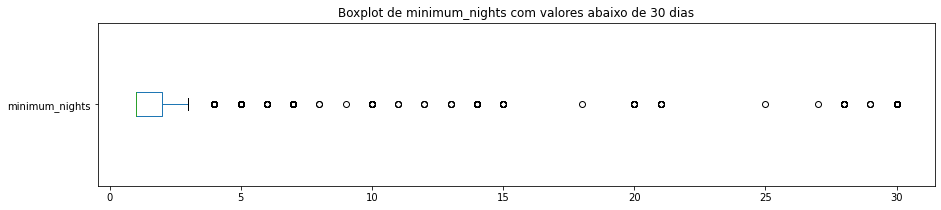

In [141]:
# minimum_nights
df.minimum_nights.plot.box(vert=False, figsize = (15,3));
plt.title('Boxplot de minimum_nights')
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
valor_corte_nights = 30
print(f'''\nPara valores acima de {valor_corte_nights} dias da variável minimum_nights temos {len(df[df.minimum_nights > valor_corte_nights])} entradas, que correspondem {((len(df[df.minimum_nights > valor_corte_nights]) / df.shape[0])):.2%} do nosso dataset\n''')


df.minimum_nights[df.minimum_nights <= valor_corte_nights].plot.box(vert=False, figsize = (15,3));
plt.title(f'Boxplot de minimum_nights com valores abaixo de {valor_corte_nights} dias')
plt.show()

In [143]:
df_clean = df.query('price <= @valor_corte_price and minimum_nights <= @valor_corte_nights').copy()

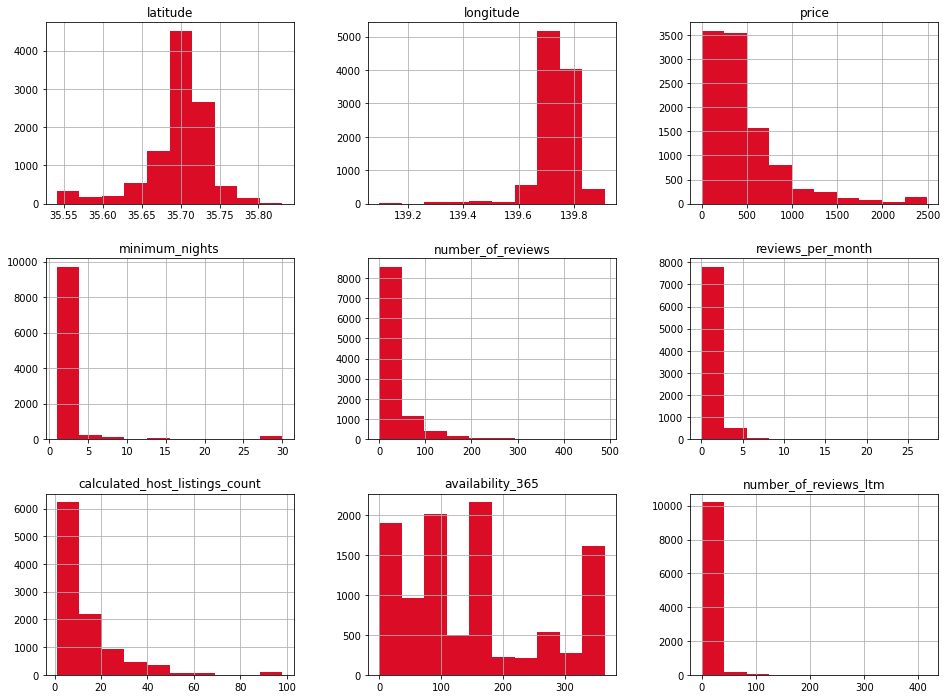

In [144]:
df_clean[['latitude','longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365','number_of_reviews_ltm']].hist(color = '#db0c26',figsize=(16,12));

In [161]:
df_clean.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)

neighbourhood
Komae Shi              839.823250
Kodaira Shi            819.113400
Minato Ku              728.489376
Chiyoda Ku             716.696740
Mitaka Shi             682.400727
Musashino Shi          592.671333
Shibuya Ku             558.481449
Chofu Shi              544.906385
Taito Ku               528.179508
Meguro Ku              524.932545
Nishitokyo Shi         494.174188
Shinagawa Ku           485.304167
Shinjuku Ku            475.556712
Koganei Shi            463.270500
Ome Shi                458.333750
Edogawa Ku             457.732349
Arakawa Ku             456.897753
Katsushika Ku          448.430249
Nakano Ku              447.842868
Toshima Ku             443.038916
Suginami Ku            439.081687
Koto Ku                438.699945
Setagaya Ku            434.760724
Kita Ku                432.295678
Itabashi Ku            418.577540
Okutama Machi          416.990000
Chuo Ku                416.196270
Sumida Ku              411.275490
Adachi Ku              411.143845


In [171]:
# criar uma matriz de correlação
corr = df_clean.query('neighbourhood == "Kodaira Shi"')[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.507091,-0.357501,-0.248403,-0.296468,-0.113759
minimum_nights,-0.507091,1.000000,0.968635,0.840092,-0.375000,-0.721551
number_of_reviews,-0.357501,0.968635,1.000000,0.825608,-0.479425,-0.773175
reviews_per_month,-0.248403,0.840092,0.825608,1.000000,-0.769792,-0.927199
calculated_host_listings_count,-0.296468,-0.375000,-0.479425,-0.769792,1.000000,0.868938
availability_365,-0.113759,-0.721551,-0.773175,-0.927199,0.868938,1.000000


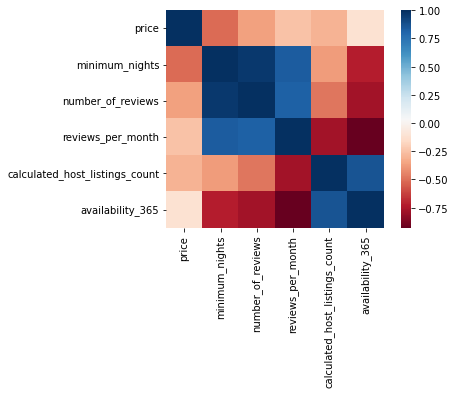

In [172]:
sns.heatmap(corr, cmap = 'RdBu', fmt='.2f', square=True, linecolor='white');